In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Data preparation
Select only the features from above and fill in the missing values with 0.<br>
Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.<br>
Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.<br>
Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [29]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [30]:
df = df.fillna(0)
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [32]:
# Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
df['rooms_per_household'] = df['total_rooms'] / df['households']

# Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

# Create a new column population_per_household by dividing the column population by the column households from dataframe.
df['population_per_household'] = df['population'] / df['households']

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


### Question 1
What is the most frequent observation (mode) for the column ocean_proximity?<br>

Options:

* NEAR BAY
* <1H OCEAN
* INLAND
* NEAR OCEAN

In [33]:
df['ocean_proximity'].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

### Split the data

___

Split your data in train/val/test sets, with 60%/20%/20% distribution.<br>
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.<br>
Make sure that the target value (median_house_value) is not in your dataframe.

In [34]:
0.2*(df.shape)[0]

4128.0

In [35]:
4128.0/(0.8*(df.shape)[0])

0.25

In [88]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train, test_size=0.25, random_state=42)

df_train.reset_index(inplace=True, drop=True)
df_val.reset_index(inplace=True, drop=True)
df_test.reset_index(inplace=True, drop=True)

y_test = df_test['median_house_value']
X_test = df_test.drop(columns='median_house_value')

y_train = df_train['median_house_value']
X_train = df_train.drop(columns='median_house_value')

y_val = df_val['median_house_value']
X_val = df_val.drop(columns='median_house_value')

print(f'The shape of df_train: {X_train.shape} , The shape of df_val: {X_val.shape} ,The shape of df_test: {X_test.shape}')
X_train.head()

The shape of df_train: (12384, 12) , The shape of df_val: (4128, 12) ,The shape of df_test: (4128, 12)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456


In [89]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,241400.0,<1H OCEAN,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,500001.0,NEAR OCEAN,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,64100.0,INLAND,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,277200.0,<1H OCEAN,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,417000.0,NEAR OCEAN,7.010127,0.139762,2.516456


### Question 2
Create the correlation matrix for the numerical features of your train dataset.<br>
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.<br>
What are the two features that have the biggest correlation in this dataset?<br>
Options:<br>

* total_bedrooms and households
* total_bedrooms and total_rooms
* population and households
* population_per_household and total_rooms

In [90]:
df['total_rooms'].dtype

dtype('float64')

In [91]:
# Numerical features
num_features = [ col for col in df.columns if ((df[col].dtype != object) & (col != 'median_house_value')) ]
num_features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [92]:
df_corr = df[num_features].corr()
df_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.027540,0.084836,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,0.106389,-0.104112,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,-0.153277,0.125396,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.133798,-0.174583,-0.024581
total_bedrooms,0.068082,-0.065318,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.002717,0.122205,-0.028019
population,0.099773,-0.108785,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.072213,0.031397,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,-0.080598,0.059818,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.326895,-0.573836,0.018766
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,1.000000,-0.387465,-0.004852
bedrooms_per_room,0.084836,-0.104112,0.125396,-0.174583,0.122205,0.031397,0.059818,-0.573836,-0.387465,1.000000,0.003047


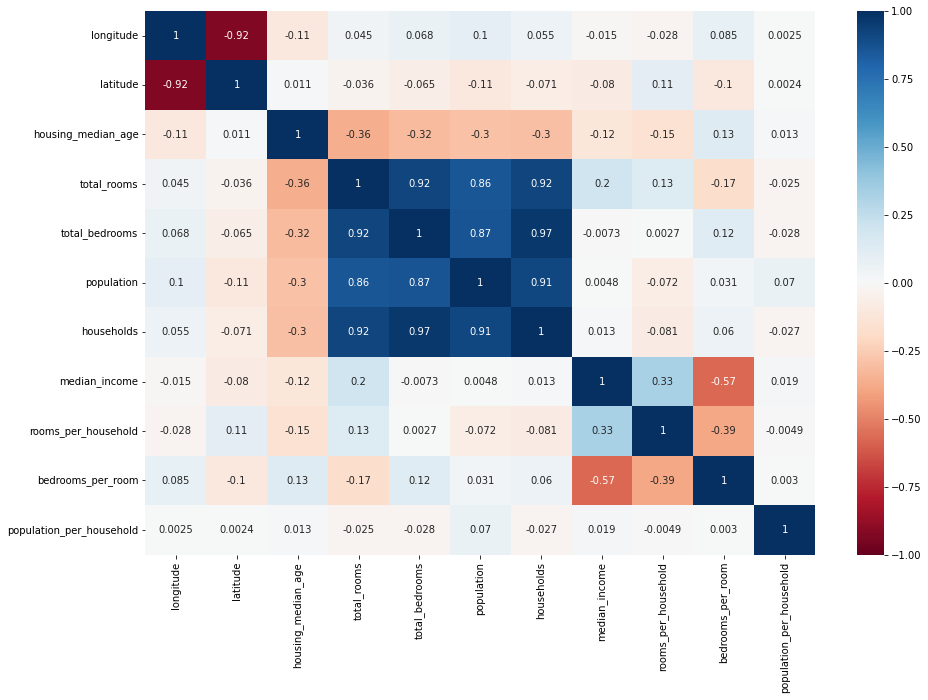

In [93]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(df_corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

### Make median_house_value binary
We need to turn the median_house_value variable from numeric into binary.<br>
Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.<br>

In [94]:
hoouse_mean = df['median_house_value'].mean()
print(f'The mean value of median_house_value is: ', meadian_val)

The mean value of median_house_value is:  206855.81690891474


In [95]:
def binariser(house_val):
    return 1 if house_val > hoouse_mean else 0
        
    

In [96]:
data_set = [X_train, X_val, X_test]
data_set_labels = [y_train, y_val, y_test]
for index in range(3):
    data_set[index]['above_average'] = data_set_labels[index].apply(binariser)
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011,1
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082,1
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059,0
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016,1
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456,1




### Question 3<br>
Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training<br> set only.<br>
What is the value of mutual information?<br>
Round it to 2 decimal digits using round(score, 2)<br>
Options:

* 0.26
* 0
* 0.10
* 0.16

In [97]:
from sklearn.metrics import mutual_info_score
mutual_info_score(X_train.ocean_proximity, X_train.above_average)

0.10138385763624205

### Question 4
Now let's train a logistic regression<br>
Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.<br>
Fit the model on the training dataset.<br>
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:<br>
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)<br>
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.<br>
Options:<br>

* 0.60
* 0.72
* 0.84
* 0.95

In [98]:
# To train a logistic regression model we would have to change all labels to the binarised value generated above.
y_train_binary = X_train['above_average']
X_train.drop(columns = 'above_average', inplace=True)

y_val_binary = X_val['above_average']
X_val.drop(columns = 'above_average', inplace=True)

y_test_binary = X_test['above_average']
X_test.drop(columns = 'above_average', inplace=True)

X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456


In [99]:
y_train_binary

0        1
1        1
2        0
3        1
4        1
        ..
12379    0
12380    0
12381    1
12382    0
12383    0
Name: above_average, Length: 12384, dtype: int64

### One-hot encoding
Using Scikit-Learn to encode categorical features

In [103]:
# Create a copy of X_train and X_validation, to see the accuarcy with all features included
X_train_copy = X_train.copy()
X_val_copy = X_val.copy()
print(f'The shape of df_train: {X_train_copy.shape} , The shape of df_val: {X_val_copy.shape}')
X_val_copy.head()

The shape of df_train: (12384, 12) , The shape of df_val: (4128, 12)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.85,36.74,35.0,1191.0,190.0,537.0,182.0,3.5375,INLAND,6.543956,0.159530,2.950549
1,-124.16,41.02,23.0,1672.0,385.0,1060.0,390.0,2.1726,NEAR OCEAN,4.287179,0.230263,2.717949
2,-117.92,33.67,14.0,6224.0,1679.0,3148.0,1589.0,4.2071,<1H OCEAN,3.916929,0.269762,1.981120
3,-118.45,34.15,10.0,1091.0,260.0,517.0,266.0,4.1727,<1H OCEAN,4.101504,0.238313,1.943609
4,-117.90,33.63,28.0,2370.0,352.0,832.0,347.0,7.1148,<1H OCEAN,6.829971,0.148523,2.397695


In [104]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = X_train_copy.to_dict(orient='records')
X_train_copy = dv.fit_transform(train_dict)

val_dict = X_val_copy.to_dict(orient='records')
X_val_copy = dv.transform(val_dict)

### Logistic regression
Binary classification


In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train a Logistic Model
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

# Fit a Logistic model
model.fit(X_train_copy, y_train_binary)

# Make prediction with a logistic model
y_pred = model.predict(X_val_copy)
y_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [106]:
print(f' The model accuracy is at : {round(accuracy_score(y_val_binary, y_pred),2)}')

 The model accuracy is at : 0.84


### Question 5
Let's find the least useful feature using the feature elimination technique.<br>
Train a model with all these features (using the same parameters as in Q4).<br>
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.<br>
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.<br>
Which of following feature has the smallest difference?<br>
* total_rooms
* total_bedrooms
* population
* households<br>
**note: the difference doesn't have to be positive**

In [111]:
def model_predict(X_t, y_t, X_v, y_v):
    # initialise a vectorizer
    dv = DictVectorizer(sparse=False)
    train_dict = X_t.to_dict(orient='records')
    X_t = dv.fit_transform(train_dict)

    val_dict = X_v.to_dict(orient='records')
    X_v = dv.transform(val_dict)
    
    # Train a Logistic Model
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

    # Fit a Logistic model
    model.fit(X_t, y_t)

    # Make prediction with a logistic model
    y_pred = model.predict(X_v)
    print(f'Without {feature} The model accuracy is at : {accuracy_score(y_v, y_pred)}')

In [112]:
features = ['total_rooms', 'total_bedrooms', 'population', 'households']
for feature in features:
    # generate the features
    X_t = X_train.copy()
    X_v = X_val.copy()
    X_t.drop(columns = feature, inplace=True)
    X_v.drop(columns = feature, inplace=True)

    model_predict(X_t, y_train_binary, X_v, y_val_binary)

Without total_rooms The model accuracy is at : 0.8359980620155039
Without total_bedrooms The model accuracy is at : 0.8355135658914729
Without population The model accuracy is at : 0.8263081395348837
Without households The model accuracy is at : 0.8340600775193798


### Question 6<br>
For this question, we'll see how to use a linear regression model from Scikit-Learn<br>
We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.<br>
Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.<br>
This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]<br>
Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.<br>
If there are multiple options, select the smallest alpha.<br>

Options:<br>

* 0
* 0.01
* 0.1
* 81
* 10

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

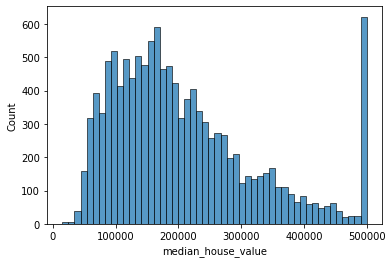

In [113]:
# Distribution plot for msrp
sns.histplot(data=y_train, bins=50 )

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

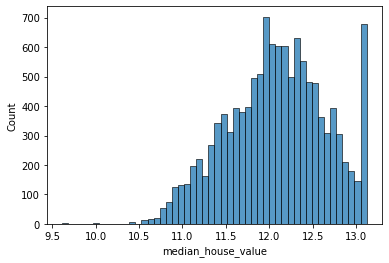

In [130]:
y_train_house_log = np.log1p(y_train)
y_val_log = np.log(y_val)
sns.histplot(median_house_log, bins=50)

In [125]:
from sklearn.linear_model import Ridge
from sklearn import metrics
import math

In [119]:
print(f'The shape of df_train: {X_train.shape} , The shape of df_val: {X_val.shape}')
X_train.head()

The shape of df_train: (12384, 12) , The shape of df_val: (4128, 12)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456


In [123]:
X_val.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.85,36.74,35.0,1191.0,190.0,537.0,182.0,3.5375,INLAND,6.543956,0.159530,2.950549
1,-124.16,41.02,23.0,1672.0,385.0,1060.0,390.0,2.1726,NEAR OCEAN,4.287179,0.230263,2.717949
2,-117.92,33.67,14.0,6224.0,1679.0,3148.0,1589.0,4.2071,<1H OCEAN,3.916929,0.269762,1.981120
3,-118.45,34.15,10.0,1091.0,260.0,517.0,266.0,4.1727,<1H OCEAN,4.101504,0.238313,1.943609
4,-117.90,33.63,28.0,2370.0,352.0,832.0,347.0,7.1148,<1H OCEAN,6.829971,0.148523,2.397695


In [132]:
# with one-hot encoding of none numerical value
for a in [0, 0.01, 0.1, 1, 10]:
    
    # create model object
    model = Ridge(alpha=a, solver="sag", random_state=42)
    
    train_dict = X_train.to_dict(orient='records')
    X_train_copy = dv.fit_transform(train_dict)

    val_dict = X_val.to_dict(orient='records')
    X_val_copy = dv.transform(val_dict)

    model.fit(X_train_copy, y_train_house_log)
    RMSE_val = math.sqrt(metrics.mean_squared_error(y_val_log, model.predict(X_val_copy)))
    print(f'The RMSE for a: {a} on Validation dataset is:  {RMSE_val} ')

The RMSE for a: 0 on Validation dataset is:  0.5240672208211673 
The RMSE for a: 0.01 on Validation dataset is:  0.5240672208382823 
The RMSE for a: 0.1 on Validation dataset is:  0.5240672210008608 
The RMSE for a: 1 on Validation dataset is:  0.5240672226352108 
The RMSE for a: 10 on Validation dataset is:  0.5240672389530213 


In [133]:
 # without none numerical value
    for a in [0, 0.01, 0.1, 1, 10]:
    
    # create model object
    model = Ridge(alpha=a, solver="sag", random_state=42)
    # Drop the none numerical column
    X_train_copy = X_train.drop(columns='ocean_proximity')
    X_val_copy = X_val.drop(columns='ocean_proximity')
    
    # fit the ridge model
    model.fit(X_train_copy, y_train_house_log)
    
    # make prediction and evaluate rmse value with validation set
    RMSE_val = math.sqrt(metrics.mean_squared_error(y_val_log, model.predict(X_val_copy)))
    print(f'The RMSE for a: {a} on Validation dataset is:  {RMSE_val} ')

The RMSE for a: 0 on Validation dataset is:  0.5244257948994556 
The RMSE for a: 0.01 on Validation dataset is:  0.5244257949157611 
The RMSE for a: 0.1 on Validation dataset is:  0.5244257950706805 
The RMSE for a: 1 on Validation dataset is:  0.5244257966280208 
The RMSE for a: 10 on Validation dataset is:  0.5244258121769595 
